## Libraries

In [6]:
import numpy as np
import pandas as pd
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression, LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Prepare the data

In [7]:
df_purchase = pd.read_csv('dataset/purchase data.csv')

scaler = pickle.load(open('pickle/scaler.pickle','rb'))
pca = pickle.load(open('pickle/pca.pickle','rb'))
kmeans_pca = pickle.load(open('pickle/kmeans_pca.pickle','rb'))

features = df_purchase.loc[:,'Sex':'Settlement size']
scaled_features = scaler.transform(features)
features_pca = pca.transform(scaled_features)
clustered_features = kmeans_pca.predict(features_pca)

df_purchase_predict = df_purchase.copy()
df_purchase_predict['Cluster'] = clustered_features

cluster_dummies = pd.get_dummies(clustered_features, prefix = 'Cluster')
df_purchase_predict = pd.concat([df_purchase_predict,cluster_dummies], axis = 1)

df_pa = df_purchase_predict.copy()

In [8]:
df_pa

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Cluster,Cluster_0,Cluster_1,Cluster_2,Cluster_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,0,1,0,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,0,1,0,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,0,1,0,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,0,1,0,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,42,1,120946,1,0,0,1,0,0,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,42,1,120946,1,0,0,1,0,0,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,42,1,120946,1,0,0,1,0,0,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,42,1,120946,1,0,0,1,0,0,0


## Model

In [9]:
y = df_pa['Incidence']

X = pd.DataFrame()
X['Mean_price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

In [10]:
X.shape

(58693, 1)

In [11]:
model = LogisticRegression(solver = 'sag')
model.fit(X,y)

LogisticRegression(solver='sag')

In [12]:
# coef is negative shows that the higher price the lower prob customer will buy
model.coef_

array([[-2.34751529]])

## Price Elasticity of Purchase probability

In [13]:
# we want to find the price range to see the purchase probability
# so we look at all the price we have, we found 1.1 is minimum and 2.8 is maximum
# so the price range we will explore have to cover this range
df_pa.loc[:,'Price_1':'Price_5'].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [14]:
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [15]:
df_price_range = pd.DataFrame(price_range)

In [16]:
y_prob = model.predict_proba(df_price_range)
purchase_prob = y_prob[:,1] # keep only prob of being 1 (prob of purchase)
price_elast = model.coef_[0,0] * price_range * (1 - purchase_prob) # calculate price elasticity

In [17]:
purchase_prob.shape

(300,)

In [18]:
price_elast.shape

(300,)

In [19]:
df_price_elasticity = pd.DataFrame(price_range)
df_price_elasticity['Mean_price_elast'] = price_elast
df_price_elasticity

,0,Mean_price_elast
0,0.50,-0.096340
1,0.51,-0.100405
2,0.52,-0.104597
3,0.53,-0.108919
4,0.54,-0.113374
...,...,...
295,3.45,-8.010884
296,3.46,-8.036131
297,3.47,-8.061344
298,3.48,-8.086522


In [20]:
pd.options.display.max_rows = None
df_price_elasticity = df_price_elasticity.rename(columns = {0:'Price'})
df_price_elasticity

,Price,Mean_price_elast
0,0.50,-0.096340
1,0.51,-0.100405
2,0.52,-0.104597
3,0.53,-0.108919
4,0.54,-0.113374
5,0.55,-0.117966
6,0.56,-0.122697
7,0.57,-0.127572
8,0.58,-0.132593
9,0.59,-0.137764


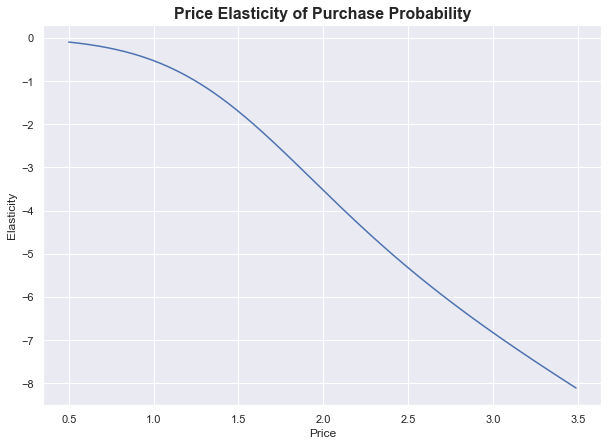

In [21]:
plt.figure(figsize = (10,7))
plt.plot(price_range, price_elast)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability', weight = 'bold', fontsize = 16)
plt.show()

### Interpretation
We can see from the graph that all price elasticity is negative.  
Absolute value of price elasticity less than 1 can infer 'inelastic'
Absolute value of price elasticity more than 1 can infer 'elastic'  
For marketing strategies, we can say that we can increase the price range in inelastic value and it won't affect customer purchase probability much  
On the other hand, we can decrease the price range in elastic value to increase the purchase probability

## Purchase probability by Clusters

### Cluster 0 - Fewer-Opportunity

In [22]:
# We do all the same approach except this time we do with only cluster 0
df_pa_cluster_0 = df_pa[df_pa['Cluster'] == 0]

y = df_pa_cluster_0['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa_cluster_0['Price_1'] +
                   df_pa_cluster_0['Price_2'] +
                   df_pa_cluster_0['Price_3'] +
                   df_pa_cluster_0['Price_4'] +
                   df_pa_cluster_0['Price_5'] ) / 5

model_incidence_segment_0 = LogisticRegression(solver = 'sag')
model_incidence_segment_0.fit(X, y)

y_prob_0 = model_incidence_segment_0.predict_proba(df_price_range)
purchase_prob_0 = y_prob_0[:,1] # keep only prob of being 1 (prob of purchase)
price_elast_0 = model_incidence_segment_0.coef_[0,0] * price_range * (1 - purchase_prob_0) # calculate price elasticity

#### Result

In [23]:
df_price_elasticity['PE_Cluster_0'] = price_elast_0
df_price_elasticity

,Price,Mean_price_elast,PE_Cluster_0
0,0.50,-0.096340,-0.030899
1,0.51,-0.100405,-0.032665
2,0.52,-0.104597,-0.034517
3,0.53,-0.108919,-0.036461
4,0.54,-0.113374,-0.038499
5,0.55,-0.117966,-0.040636
6,0.56,-0.122697,-0.042877
7,0.57,-0.127572,-0.045225
8,0.58,-0.132593,-0.047686
9,0.59,-0.137764,-0.050264


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

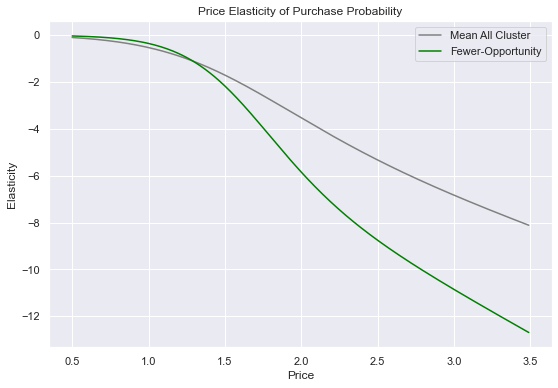

In [24]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elast, color = 'grey')
plt.plot(price_range, price_elast_0, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.legend(['Mean All Cluster','Fewer-Opportunity'])
plt.title('Price Elasticity of Purchase Probability')

### Cluster 1 - Well-Off

In [25]:
# We do all the same approach except this time we do with only cluster 0
df_pa_cluster_1 = df_pa[df_pa['Cluster'] == 1]

y = df_pa_cluster_1['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa_cluster_1['Price_1'] +
                   df_pa_cluster_1['Price_2'] +
                   df_pa_cluster_1['Price_3'] +
                   df_pa_cluster_1['Price_4'] +
                   df_pa_cluster_1['Price_5'] ) / 5

model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, y)

y_prob_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_prob_1 = y_prob_1[:,1] # keep only prob of being 1 (prob of purchase)
price_elast_1 = model_incidence_segment_1.coef_[0,0] * price_range * (1 - purchase_prob_1) # calculate price elasticity

#### Result

In [26]:
df_price_elasticity['PE_Cluster_1'] = price_elast_1
df_price_elasticity

,Price,Mean_price_elast,PE_Cluster_0,PE_Cluster_1
0,0.50,-0.096340,-0.030899,-0.167996
1,0.51,-0.100405,-0.032665,-0.172919
2,0.52,-0.104597,-0.034517,-0.177913
3,0.53,-0.108919,-0.036461,-0.182978
4,0.54,-0.113374,-0.038499,-0.188114
5,0.55,-0.117966,-0.040636,-0.193323
6,0.56,-0.122697,-0.042877,-0.198603
7,0.57,-0.127572,-0.045225,-0.203956
8,0.58,-0.132593,-0.047686,-0.209382
9,0.59,-0.137764,-0.050264,-0.214882


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

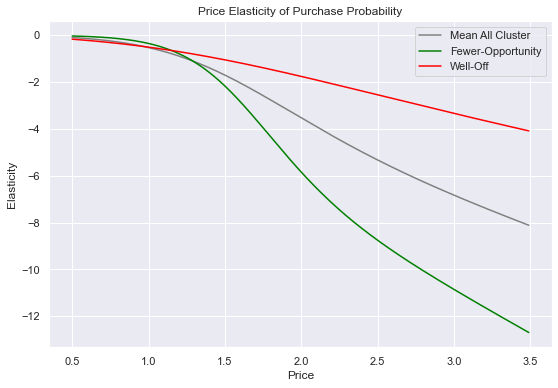

In [27]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elast, color = 'grey')
plt.plot(price_range, price_elast_0, color = 'green')
plt.plot(price_range, price_elast_1, color = 'red')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.legend(['Mean All Cluster','Fewer-Opportunity','Well-Off'])
plt.title('Price Elasticity of Purchase Probability')

### Cluster 2 - Standard

In [28]:
# We do all the same approach except this time we do with only cluster 0
df_pa_cluster_2 = df_pa[df_pa['Cluster'] == 2]

y = df_pa_cluster_2['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa_cluster_2['Price_1'] +
                   df_pa_cluster_2['Price_2'] +
                   df_pa_cluster_2['Price_3'] +
                   df_pa_cluster_2['Price_4'] +
                   df_pa_cluster_2['Price_5'] ) / 5

model_incidence_segment_2 = LogisticRegression(solver = 'sag')
model_incidence_segment_2.fit(X, y)

y_prob_2 = model_incidence_segment_2.predict_proba(df_price_range)
purchase_prob_2 = y_prob_2[:,1] # keep only prob of being 1 (prob of purchase)
price_elast_2 = model_incidence_segment_2.coef_[0,0] * price_range * (1 - purchase_prob_2) # calculate price elasticity

#### Result

In [29]:
df_price_elasticity['PE_Cluster_2'] = price_elast_2
df_price_elasticity

,Price,Mean_price_elast,PE_Cluster_0,PE_Cluster_1,PE_Cluster_2
0,0.50,-0.096340,-0.030899,-0.167996,-0.211188
1,0.51,-0.100405,-0.032665,-0.172919,-0.217754
2,0.52,-0.104597,-0.034517,-0.177913,-0.224428
3,0.53,-0.108919,-0.036461,-0.182978,-0.231210
4,0.54,-0.113374,-0.038499,-0.188114,-0.238101
5,0.55,-0.117966,-0.040636,-0.193323,-0.245102
6,0.56,-0.122697,-0.042877,-0.198603,-0.252214
7,0.57,-0.127572,-0.045225,-0.203956,-0.259436
8,0.58,-0.132593,-0.047686,-0.209382,-0.266771
9,0.59,-0.137764,-0.050264,-0.214882,-0.274218


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

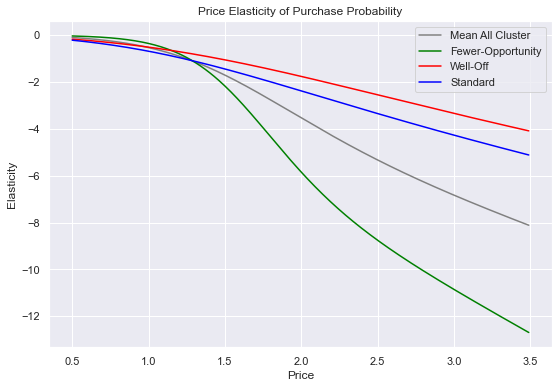

In [30]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elast, color = 'grey')
plt.plot(price_range, price_elast_0, color = 'green')
plt.plot(price_range, price_elast_1, color = 'red')
plt.plot(price_range, price_elast_2, color = 'blue')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.legend(['Mean All Cluster','Fewer-Opportunity','Well-Off','Standard'])
plt.title('Price Elasticity of Purchase Probability')

### Cluster 3 - Career-Focused

In [31]:
# We do all the same approach except this time we do with only cluster 0
df_pa_cluster_3 = df_pa[df_pa['Cluster'] == 3]

y = df_pa_cluster_3['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa_cluster_3['Price_1'] +
                   df_pa_cluster_3['Price_2'] +
                   df_pa_cluster_3['Price_3'] +
                   df_pa_cluster_3['Price_4'] +
                   df_pa_cluster_3['Price_5'] ) / 5

model_incidence_segment_3 = LogisticRegression(solver = 'sag')
model_incidence_segment_3.fit(X, y)

y_prob_3 = model_incidence_segment_3.predict_proba(df_price_range)
purchase_prob_3 = y_prob_3[:,1] # keep only prob of being 1 (prob of purchase)
price_elast_3 = model_incidence_segment_3.coef_[0,0] * price_range * (1 - purchase_prob_3) # calculate price elasticity

#### Result

In [32]:
df_price_elasticity['PE_Cluster_3'] = price_elast_3
df_price_elasticity

,Price,Mean_price_elast,PE_Cluster_0,PE_Cluster_1,PE_Cluster_2,PE_Cluster_3
0,0.50,-0.096340,-0.030899,-0.167996,-0.211188,-0.119115
1,0.51,-0.100405,-0.032665,-0.172919,-0.217754,-0.123300
2,0.52,-0.104597,-0.034517,-0.177913,-0.224428,-0.127578
3,0.53,-0.108919,-0.036461,-0.182978,-0.231210,-0.131952
4,0.54,-0.113374,-0.038499,-0.188114,-0.238101,-0.136422
5,0.55,-0.117966,-0.040636,-0.193323,-0.245102,-0.140989
6,0.56,-0.122697,-0.042877,-0.198603,-0.252214,-0.145656
7,0.57,-0.127572,-0.045225,-0.203956,-0.259436,-0.150424
8,0.58,-0.132593,-0.047686,-0.209382,-0.266771,-0.155294
9,0.59,-0.137764,-0.050264,-0.214882,-0.274218,-0.160268


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

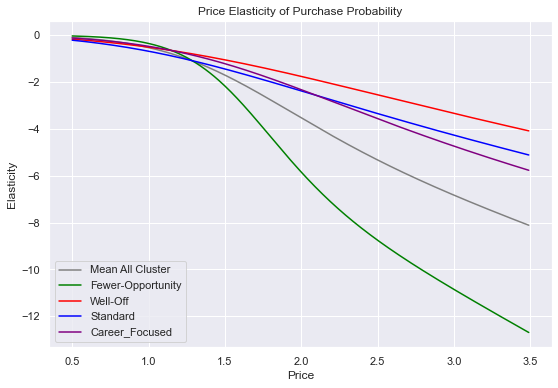

In [33]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elast, color = 'grey')
plt.plot(price_range, price_elast_0, color = 'green')
plt.plot(price_range, price_elast_1, color = 'red')
plt.plot(price_range, price_elast_2, color = 'blue')
plt.plot(price_range, price_elast_3, color = 'purple')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.legend(['Mean All Cluster','Fewer-Opportunity','Well-Off','Standard','Career_Focused'])
plt.title('Price Elasticity of Purchase Probability')

## Promotion Elasticity of Purchase Probability

### Prepare data and model

In [34]:
y = df_pa['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

In [35]:
X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5

In [36]:
y.shape

(58693,)

In [37]:
pd.options.display.max_rows = 10
pd.options.display.max_columns = None

In [38]:
model_promotion = LogisticRegression(solver = 'sag')
model_promotion.fit(X,y)
model_promotion.coef_

array([[-1.49412977,  0.56156177]])

In [39]:
model_promotion.coef_[0,:]

array([-1.49412977,  0.56156177])

### Find insights

#### Promotion == 1

In [40]:
df_price_elasticity_promo = pd.DataFrame(price_range)
df_price_elasticity_promo = df_price_elasticity_promo.rename(columns = {0:'Price_range'})

In [41]:
df_price_elasticity_promo['Promotion'] = 1

In [42]:
y_promo = model_promotion.predict_proba(df_price_elasticity_promo)

In [43]:
promo = y_promo[:,1]
price_elasticity_promo = (model_promotion.coef_[:,0] * price_range) * (1-promo)

In [44]:
df_price_elasticity['Elasticity_Promo_1'] = price_elasticity_promo
df_price_elasticity

,Price,Mean_price_elast,PE_Cluster_0,PE_Cluster_1,PE_Cluster_2,PE_Cluster_3,Elasticity_Promo_1
0,0.50,-0.096340,-0.030899,-0.167996,-0.211188,-0.119115,-0.125734
1,0.51,-0.100405,-0.032665,-0.172919,-0.217754,-0.123300,-0.129851
2,0.52,-0.104597,-0.034517,-0.177913,-0.224428,-0.127578,-0.134046
3,0.53,-0.108919,-0.036461,-0.182978,-0.231210,-0.131952,-0.138321
4,0.54,-0.113374,-0.038499,-0.188114,-0.238101,-0.136422,-0.142677
...,...,...,...,...,...,...,...
295,3.45,-8.010884,-12.542811,-4.022400,-5.044393,-5.684732,-4.862027
296,3.46,-8.036131,-12.579731,-4.037270,-5.061230,-5.704896,-4.880230
297,3.47,-8.061344,-12.616634,-4.052122,-5.078048,-5.725023,-4.898402
298,3.48,-8.086522,-12.653521,-4.066959,-5.094849,-5.745114,-4.916544


#### Promotion == 0

In [45]:
df_price_elasticity_promo['Promotion'] = 0
y_no_promo = model_promotion.predict_proba(df_price_elasticity_promo)
no_promo = y_no_promo[:,1]
price_elasticity_no_promo = (model_promotion.coef_[:,0] * price_range) * (1-no_promo)
df_price_elasticity['Elasticity_Promo_0'] = price_elasticity_no_promo
df_price_elasticity

,Price,Mean_price_elast,PE_Cluster_0,PE_Cluster_1,PE_Cluster_2,PE_Cluster_3,Elasticity_Promo_1,Elasticity_Promo_0
0,0.50,-0.096340,-0.030899,-0.167996,-0.211188,-0.119115,-0.125734,-0.195654
1,0.51,-0.100405,-0.032665,-0.172919,-0.217754,-0.123300,-0.129851,-0.201776
2,0.52,-0.104597,-0.034517,-0.177913,-0.224428,-0.127578,-0.134046,-0.208000
3,0.53,-0.108919,-0.036461,-0.182978,-0.231210,-0.131952,-0.138321,-0.214328
4,0.54,-0.113374,-0.038499,-0.188114,-0.238101,-0.136422,-0.142677,-0.220760
...,...,...,...,...,...,...,...,...
295,3.45,-8.010884,-12.542811,-4.022400,-5.044393,-5.684732,-4.862027,-4.983629
296,3.46,-8.036131,-12.579731,-4.037270,-5.061230,-5.704896,-4.880230,-5.000536
297,3.47,-8.061344,-12.616634,-4.052122,-5.078048,-5.725023,-4.898402,-5.017423
298,3.48,-8.086522,-12.653521,-4.066959,-5.094849,-5.745114,-4.916544,-5.034290


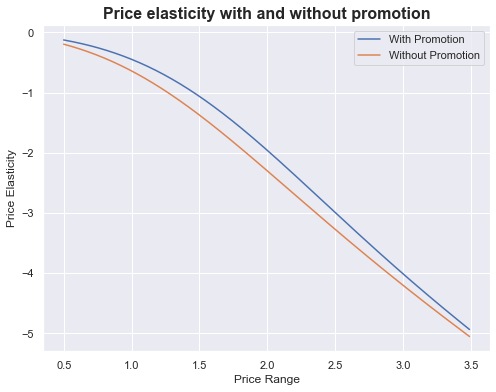

In [46]:
plt.figure(figsize = (8,6))
plt.plot(price_range, price_elasticity_promo)
plt.plot(price_range, price_elasticity_no_promo)
plt.xlabel('Price Range')
plt.ylabel('Price Elasticity')
plt.legend(['With Promotion','Without Promotion'])
plt.title('Price elasticity with and without promotion', weight = 'bold', fontsize = 16)
plt.show()

## Interpretation
With promotion, we can offer higher price before customer get inelasticity.  
In the other words, people are more less price sensitive when there is a promotion.  
So, it's a better idea to set the original price higher and have constant promotion instead of setting the original price lower

## Brand choice prediction

### Prepare data and choose features

In [47]:
df_brand_choice = df_pa[df_pa['Incidence'] == 1] # Make sure we choose only rows that there are purchases

In [48]:
df_brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster,Cluster_0,Cluster_1,Cluster_2,Cluster_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0,0,0,47,1,110866,1,0,0,1,0,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,2.12,2.62,1,0,0,0,1,0,0,47,1,110866,1,0,0,1,0,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,1.97,2.67,0,0,0,1,0,0,0,47,1,110866,1,0,0,1,0,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,2.16,2.68,1,1,0,0,0,0,0,47,1,110866,1,0,0,1,0,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,1.89,2.37,1,0,0,1,1,0,0,47,1,110866,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,2.18,2.69,0,0,0,0,0,0,0,42,1,120946,1,0,0,1,0,0,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,2.21,2.70,1,1,0,0,0,0,0,42,1,120946,1,0,0,1,0,0,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,2.24,2.79,1,1,0,0,0,0,0,42,1,120946,1,0,0,1,0,0,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,2.24,2.78,0,0,0,0,0,0,0,42,1,120946,1,0,0,1,0,0,0


In [49]:
features = ['Price_1','Price_2','Price_3','Price_4','Price_5'] # Once again use price as features
X = df_brand_choice[features]
y = df_brand_choice['Brand']

In [50]:
model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_brand_choice.fit(X,y)
model_brand_choice.coef_ 
# Columns represent features
# Rows represent Brands

array([[-3.91594064,  0.65846544,  2.41778497,  0.70409284, -0.2020881 ],
       [ 1.27461401, -1.87985524, -0.21264255, -0.2063397 ,  0.58787248],
       [ 1.62416655,  0.56210348,  0.50081323,  1.0394972 ,  0.45276004],
       [ 0.57453842,  0.39558783, -1.40060704, -1.24624357,  0.24935275],
       [ 0.44262167,  0.26369849, -1.30534861, -0.29100676, -1.08789717]])

In [51]:
# Rearrange
df_brand_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
df_brand_coef.columns = ['Brand_1','Brand_2','Brand_3','Brand_4','Brand_5']
df_brand_coef.index = ['Price_1','Price_2','Price_3','Price_4','Price_5']
df_brand_coef

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Price_1,-3.915941,1.274614,1.624167,0.574538,0.442622
Price_2,0.658465,-1.879855,0.562103,0.395588,0.263698
Price_3,2.417785,-0.212643,0.500813,-1.400607,-1.305349
Price_4,0.704093,-0.206340,1.039497,-1.246244,-0.291007
Price_5,-0.202088,0.587872,0.452760,0.249353,-1.087897


### Interpretation
Example with Brand_1: We can see that Brand 1 and Price_1 itself (the price of its own brand) have negative coef  
This means the higher the price, the lower prob to buy. But for other price except Price_5
the coefs are positive. This means the higher the price of other brands, the higher prob to buy its own brand (Brand_1)  
And this can intepret the same thing for other brands as well  
In marketing, this is also known <b>'Own brand'</b> and <b>'Cross brand'</b> effect

## Own brand 5

In [52]:
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Brand_1'] = df_brand_choice['Price_1'].mean()
df_own_brand_5['Brand_2'] = df_brand_choice['Price_2'].mean()
df_own_brand_5['Brand_3'] = df_brand_choice['Price_3'].mean()
df_own_brand_5['Brand_4'] = df_brand_choice['Price_4'].mean()
df_own_brand_5['Brand_5'] = price_range
df_own_brand_5

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [53]:
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)

In [54]:
predict_brand_5[:,4]

array([0.90999084, 0.90894775, 0.90789297, 0.90682637, 0.90574785,
       0.90465731, 0.90355462, 0.90243967, 0.90131236, 0.90017257,
       0.89902019, 0.89785511, 0.8966772 , 0.89548637, 0.89428248,
       0.89306544, 0.89183513, 0.89059143, 0.88933422, 0.8880634 ,
       0.88677885, 0.88548046, 0.88416811, 0.88284169, 0.88150108,
       0.88014617, 0.87877685, 0.87739301, 0.87599452, 0.87458128,
       0.87315318, 0.8717101 , 0.87025194, 0.86877857, 0.8672899 ,
       0.8657858 , 0.86426618, 0.86273092, 0.86117991, 0.85961305,
       0.85803022, 0.85643134, 0.85481628, 0.85318494, 0.85153723,
       0.84987303, 0.84819226, 0.8464948 , 0.84478057, 0.84304945,
       0.84130136, 0.83953621, 0.83775389, 0.83595432, 0.83413741,
       0.83230306, 0.8304512 , 0.82858172, 0.82669456, 0.82478963,
       0.82286685, 0.82092614, 0.81896743, 0.81699064, 0.8149957 ,
       0.81298254, 0.8109511 , 0.8089013 , 0.80683309, 0.80474641,
       0.8026412 , 0.80051741, 0.79837498, 0.79621386, 0.79403

In [55]:
prob_own_brand_5 = predict_brand_5[:,4]

In [56]:
beta5 = df_brand_coef.iloc[-1,-1]
beta5

-1.0878971732262488

In [57]:
own_price_elast_brand_5 = beta5 * price_range * (1-prob_own_brand_5)

In [58]:
df_price_elasticity['Brand 5'] = own_price_elast_brand_5
df_price_elasticity

,Price,Mean_price_elast,PE_Cluster_0,PE_Cluster_1,PE_Cluster_2,PE_Cluster_3,Elasticity_Promo_1,Elasticity_Promo_0,Brand 5
0,0.50,-0.096340,-0.030899,-0.167996,-0.211188,-0.119115,-0.125734,-0.195654,-0.048960
1,0.51,-0.100405,-0.032665,-0.172919,-0.217754,-0.123300,-0.129851,-0.201776,-0.050518
2,0.52,-0.104597,-0.034517,-0.177913,-0.224428,-0.127578,-0.134046,-0.208000,-0.052106
3,0.53,-0.108919,-0.036461,-0.182978,-0.231210,-0.131952,-0.138321,-0.214328,-0.053723
4,0.54,-0.113374,-0.038499,-0.188114,-0.238101,-0.136422,-0.142677,-0.220760,-0.055370
...,...,...,...,...,...,...,...,...,...
295,3.45,-8.010884,-12.542811,-4.022400,-5.044393,-5.684732,-4.862027,-4.983629,-3.225338
296,3.46,-8.036131,-12.579731,-4.037270,-5.061230,-5.704896,-4.880230,-5.000536,-3.241500
297,3.47,-8.061344,-12.616634,-4.052122,-5.078048,-5.725023,-4.898402,-5.017423,-3.257631
298,3.48,-8.086522,-12.653521,-4.066959,-5.094849,-5.745114,-4.916544,-5.034290,-3.273729


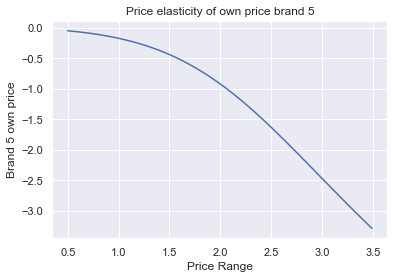

In [59]:
plt.plot(price_range, own_price_elast_brand_5)
plt.xlabel('Price Range')
plt.ylabel('Brand 5 own price')
plt.title('Price elasticity of own price brand 5')
plt.show()

## Cross Price Elasticity Brand 5, cross brand 4

In [60]:
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = df_brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = df_brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = df_brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = df_brand_choice['Price_5'].mean()

In [61]:
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [62]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)

In [63]:
pr_brand_4 = predict_brand5_cross_brand4[:,3]

In [64]:
# formula for calculating cross brand elasticity
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4

In [65]:
df_price_elasticity['Brand_5_Cross_Brand_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticity

,Price,Mean_price_elast,PE_Cluster_0,PE_Cluster_1,PE_Cluster_2,PE_Cluster_3,Elasticity_Promo_1,Elasticity_Promo_0,Brand 5,Brand_5_Cross_Brand_4
0,0.50,-0.096340,-0.030899,-0.167996,-0.211188,-0.119115,-0.125734,-0.195654,-0.048960,0.331371
1,0.51,-0.100405,-0.032665,-0.172919,-0.217754,-0.123300,-0.129851,-0.201776,-0.050518,0.336637
2,0.52,-0.104597,-0.034517,-0.177913,-0.224428,-0.127578,-0.134046,-0.208000,-0.052106,0.341846
3,0.53,-0.108919,-0.036461,-0.182978,-0.231210,-0.131952,-0.138321,-0.214328,-0.053723,0.346998
4,0.54,-0.113374,-0.038499,-0.188114,-0.238101,-0.136422,-0.142677,-0.220760,-0.055370,0.352093
...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.010884,-12.542811,-4.022400,-5.044393,-5.684732,-4.862027,-4.983629,-3.225338,0.161922
296,3.46,-8.036131,-12.579731,-4.037270,-5.061230,-5.704896,-4.880230,-5.000536,-3.241500,0.160025
297,3.47,-8.061344,-12.616634,-4.052122,-5.078048,-5.725023,-4.898402,-5.017423,-3.257631,0.158143
298,3.48,-8.086522,-12.653521,-4.066959,-5.094849,-5.745114,-4.916544,-5.034290,-3.273729,0.156275


Text(0.5, 1.0, 'Cross Price Elasticity of Brand 5 wrt Brand 4')

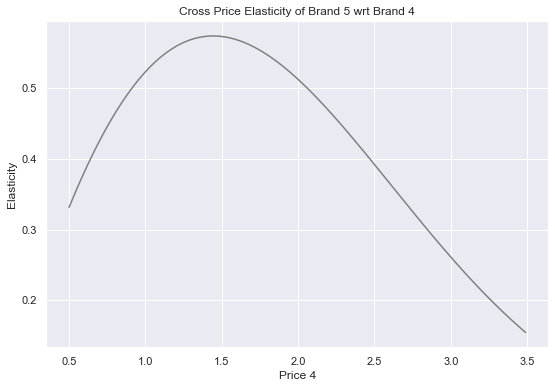

In [66]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, brand5_cross_brand4_price_elasticity, color = 'grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt Brand 4')

### Interpretation
If cross price elasticity > 0. That means this brand is <b>'substitute'</b>  
Moreover, if it's > 1. It means <b>'Strong substitute'</b>  
In this case, brand 5 is substitute of brand 4

## Own Price Elasticity by Cluster

### Well-off

In [67]:
brand_choice_c1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_c1 = brand_choice_c1[brand_choice_c1['Cluster'] == 1]

pd.options.display.max_rows = 100
brand_choice_c1

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster,Cluster_0,Cluster_1,Cluster_2,Cluster_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,2.09,2.66,0,0,0,0,0,1,1,52,2,159052,2,1,1,0,1,0,0
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,2.12,2.67,0,0,0,1,0,1,1,52,2,159052,2,1,1,0,1,0,0
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,2.14,2.64,0,0,0,0,0,1,1,52,2,159052,2,1,1,0,1,0,0
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,2.03,2.68,1,0,0,1,0,1,1,52,2,159052,2,1,1,0,1,0,0
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,2.21,2.65,0,0,0,1,0,1,1,52,2,159052,2,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,200000489,687,1,4,1,4,1,1.50,1.87,2.06,2.24,2.78,0,0,0,0,0,1,1,44,2,193816,2,1,1,0,1,0,0
57347,200000489,693,1,4,2,4,1,1.42,1.51,2.02,2.24,2.77,0,1,0,0,0,1,1,44,2,193816,2,1,1,0,1,0,0
57348,200000489,701,1,4,3,4,1,1.42,1.85,1.99,2.24,2.76,0,0,1,0,0,1,1,44,2,193816,2,1,1,0,1,0,0
57350,200000489,715,1,4,2,0,0,1.50,1.80,2.09,2.24,2.79,0,0,0,0,0,1,1,44,2,193816,2,1,1,0,1,0,0


In [68]:
# model estimation
Y = brand_choice_c1['Brand']
brand_choice_c1 = pd.get_dummies(brand_choice_c1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_choice_c1
X = brand_choice_c1[features]
model_brand_choice_c1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_c1.fit(X, Y)

#coefficients table for cluster 1
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_c1.coef_))
bc_coef.columns = ['Brand_1','Brand_2','Brand_3','Brand_4','Brand_5']
bc_coef.index = ['Price_1','Price_2','Price_3','Price_4','Price_5']
bc_coef = bc_coef.round(2)
bc_coef

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Price_1,-2.15,1.33,0.82,0.12,-0.11
Price_2,-0.96,-1.38,1.29,0.78,0.27
Price_3,2.01,-1.65,-0.49,0.03,0.11
Price_4,2.52,0.96,-0.25,-1.90,-1.33
Price_5,-0.99,-0.30,1.17,0.56,-0.44


#### Own-brand price elasticity

In [69]:
df_own_brand_5_c1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_c1['Price_1'] = brand_choice_c1['Price_1'].mean()
df_own_brand_5_c1['Price_2'] = brand_choice_c1['Price_2'].mean()
df_own_brand_5_c1['Price_3'] = brand_choice_c1['Price_3'].mean()
df_own_brand_5_c1['Price_4'] = brand_choice_c1['Price_4'].mean()
df_own_brand_5_c1['Price_5'] = price_range

predict_own_brand_5_c1 = model_brand_choice_c1.predict_proba(df_own_brand_5_c1)
pr_own_brand_5_c1 = predict_own_brand_5_c1[: ][: , 4]

own_price_elasticity_brand_5_c1 =  beta5 * price_range * (1 - pr_own_brand_5_c1)
df_price_elasticity['Brand 5 C1'] = own_price_elasticity_brand_5_c1

#### Cross-brand price elasticity

In [70]:
df_brand5_cross_brand4_c1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_c1['Price_1'] = brand_choice_c1['Price_1'].mean()
df_brand5_cross_brand4_c1['Price_2'] = brand_choice_c1['Price_2'].mean()
df_brand5_cross_brand4_c1['Price_3'] = brand_choice_c1['Price_3'].mean()
df_brand5_cross_brand4_c1['Price_4'] = price_range
df_brand5_cross_brand4_c1['Price_5'] = brand_choice_c1['Price_5'].mean()

predict_brand5_cross_brand4_c1 = model_brand_choice_c1.predict_proba(df_brand5_cross_brand4_c1)
pr_cross_brand_5_c1 = predict_brand5_cross_brand4_c1[: ][: , 3]

brand5_cross_brand4_price_elasticity_c1 = -beta5 * price_range * pr_cross_brand_5_c1
df_price_elasticity['Brand_5_Cross_Brand_4_C1'] = brand5_cross_brand4_price_elasticity_c1
pd.options.display.max_rows = None
df_price_elasticity

,Price,Mean_price_elast,PE_Cluster_0,PE_Cluster_1,PE_Cluster_2,PE_Cluster_3,Elasticity_Promo_1,Elasticity_Promo_0,Brand 5,Brand_5_Cross_Brand_4,Brand 5 C1,Brand_5_Cross_Brand_4_C1
0,0.50,-0.096340,-0.030899,-0.167996,-0.211188,-0.119115,-0.125734,-0.195654,-0.048960,0.331371,-0.296739,0.481490
1,0.51,-0.100405,-0.032665,-0.172919,-0.217754,-0.123300,-0.129851,-0.201776,-0.050518,0.336637,-0.302774,0.490777
2,0.52,-0.104597,-0.034517,-0.177913,-0.224428,-0.127578,-0.134046,-0.208000,-0.052106,0.341846,-0.308818,0.500049
3,0.53,-0.108919,-0.036461,-0.182978,-0.231210,-0.131952,-0.138321,-0.214328,-0.053723,0.346998,-0.314874,0.509305
4,0.54,-0.113374,-0.038499,-0.188114,-0.238101,-0.136422,-0.142677,-0.220760,-0.055370,0.352093,-0.320940,0.518545
5,0.55,-0.117966,-0.040636,-0.193323,-0.245102,-0.140989,-0.147116,-0.227297,-0.057048,0.357130,-0.327018,0.527770
6,0.56,-0.122697,-0.042877,-0.198603,-0.252214,-0.145656,-0.151637,-0.233939,-0.058757,0.362109,-0.333107,0.536978
7,0.57,-0.127572,-0.045225,-0.203956,-0.259436,-0.150424,-0.156242,-0.240688,-0.060497,0.367031,-0.339209,0.546171
8,0.58,-0.132593,-0.047686,-0.209382,-0.266771,-0.155294,-0.160931,-0.247544,-0.062270,0.371895,-0.345324,0.555347
9,0.59,-0.137764,-0.050264,-0.214882,-0.274218,-0.160268,-0.165707,-0.254508,-0.064075,0.376702,-0.351451,0.564506


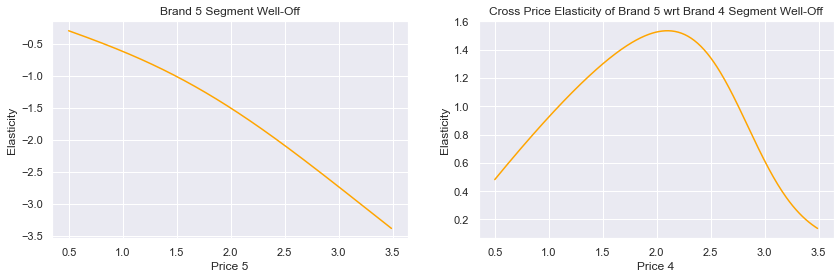

In [71]:
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_c1, color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_c1, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

### Fewer-Opportunity

In [72]:
brand_choice_c0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_c0 = brand_choice_c0[brand_choice_c0['Cluster'] == 0]

pd.options.display.max_rows = 100
brand_choice_c0

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster,Cluster_0,Cluster_1,Cluster_2,Cluster_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0,0,0,47,1,110866,1,0,0,1,0,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,2.12,2.62,1,0,0,0,1,0,0,47,1,110866,1,0,0,1,0,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,1.97,2.67,0,0,0,1,0,0,0,47,1,110866,1,0,0,1,0,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,2.16,2.68,1,1,0,0,0,0,0,47,1,110866,1,0,0,1,0,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,1.89,2.37,1,0,0,1,1,0,0,47,1,110866,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,2.18,2.69,0,0,0,0,0,0,0,42,1,120946,1,0,0,1,0,0,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,2.21,2.70,1,1,0,0,0,0,0,42,1,120946,1,0,0,1,0,0,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,2.24,2.79,1,1,0,0,0,0,0,42,1,120946,1,0,0,1,0,0,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,2.24,2.78,0,0,0,0,0,0,0,42,1,120946,1,0,0,1,0,0,0


In [73]:
# model estimation
Y = brand_choice_c0['Brand']
brand_choice_c0 = pd.get_dummies(brand_choice_c0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_choice_c0
X = brand_choice_c0[features]
model_brand_choice_c0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_c0.fit(X, Y)

#coefficients table for cluster 0
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_c0.coef_))
bc_coef.columns = ['Brand_1','Brand_2','Brand_3','Brand_4','Brand_5']
bc_coef.index = ['Price_1','Price_2','Price_3','Price_4','Price_5']
bc_coef = bc_coef.round(2)
bc_coef

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Price_1,-3.95,1.63,1.12,0.21,0.99
Price_2,0.66,-2.13,0.07,0.25,1.15
Price_3,1.25,0.05,1.19,-0.31,-2.19
Price_4,1.31,-0.31,1.59,-1.58,-1.01
Price_5,0.93,1.28,0.19,0.52,-2.93


#### Own-brand price elasticity

In [74]:
df_own_brand_5_c0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_c0['Price_1'] = brand_choice_c0['Price_1'].mean()
df_own_brand_5_c0['Price_2'] = brand_choice_c0['Price_2'].mean()
df_own_brand_5_c0['Price_3'] = brand_choice_c0['Price_3'].mean()
df_own_brand_5_c0['Price_4'] = brand_choice_c0['Price_4'].mean()
df_own_brand_5_c0['Price_5'] = price_range

predict_own_brand_5_c0 = model_brand_choice_c0.predict_proba(df_own_brand_5_c0)
pr_own_brand_5_c0 = predict_own_brand_5_c0[: ][: , 4]

own_price_elasticity_brand_5_c0 =  beta5 * price_range * (1 - pr_own_brand_5_c0)
df_price_elasticity['Brand 5 C0'] = own_price_elasticity_brand_5_c0

#### Cross-brand price elasticity

In [75]:
df_brand5_cross_brand4_c0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_c0['Price_1'] = brand_choice_c0['Price_1'].mean()
df_brand5_cross_brand4_c0['Price_2'] = brand_choice_c0['Price_2'].mean()
df_brand5_cross_brand4_c0['Price_3'] = brand_choice_c0['Price_3'].mean()
df_brand5_cross_brand4_c0['Price_4'] = price_range
df_brand5_cross_brand4_c0['Price_5'] = brand_choice_c0['Price_5'].mean()

predict_brand5_cross_brand4_c0 = model_brand_choice_c0.predict_proba(df_brand5_cross_brand4_c0)
pr_cross_brand_5_c0 = predict_brand5_cross_brand4_c0[: ][: , 3]

brand5_cross_brand4_price_elasticity_c0 = -beta5 * price_range * pr_cross_brand_5_c0
df_price_elasticity['Brand_5_Cross_Brand_4_c0'] = brand5_cross_brand4_price_elasticity_c0
pd.options.display.max_rows = None
df_price_elasticity

,Price,Mean_price_elast,PE_Cluster_0,PE_Cluster_1,PE_Cluster_2,PE_Cluster_3,Elasticity_Promo_1,Elasticity_Promo_0,Brand 5,Brand_5_Cross_Brand_4,Brand 5 C1,Brand_5_Cross_Brand_4_C1,Brand 5 C0,Brand_5_Cross_Brand_4_c0
0,0.50,-0.096340,-0.030899,-0.167996,-0.211188,-0.119115,-0.125734,-0.195654,-0.048960,0.331371,-0.296739,0.481490,-0.001034,0.181244
1,0.51,-0.100405,-0.032665,-0.172919,-0.217754,-0.123300,-0.129851,-0.201776,-0.050518,0.336637,-0.302774,0.490777,-0.001096,0.183537
2,0.52,-0.104597,-0.034517,-0.177913,-0.224428,-0.127578,-0.134046,-0.208000,-0.052106,0.341846,-0.308818,0.500049,-0.001161,0.185780
3,0.53,-0.108919,-0.036461,-0.182978,-0.231210,-0.131952,-0.138321,-0.214328,-0.053723,0.346998,-0.314874,0.509305,-0.001229,0.187975
4,0.54,-0.113374,-0.038499,-0.188114,-0.238101,-0.136422,-0.142677,-0.220760,-0.055370,0.352093,-0.320940,0.518545,-0.001300,0.190122
5,0.55,-0.117966,-0.040636,-0.193323,-0.245102,-0.140989,-0.147116,-0.227297,-0.057048,0.357130,-0.327018,0.527770,-0.001376,0.192221
6,0.56,-0.122697,-0.042877,-0.198603,-0.252214,-0.145656,-0.151637,-0.233939,-0.058757,0.362109,-0.333107,0.536978,-0.001455,0.194272
7,0.57,-0.127572,-0.045225,-0.203956,-0.259436,-0.150424,-0.156242,-0.240688,-0.060497,0.367031,-0.339209,0.546171,-0.001539,0.196275
8,0.58,-0.132593,-0.047686,-0.209382,-0.266771,-0.155294,-0.160931,-0.247544,-0.062270,0.371895,-0.345324,0.555347,-0.001626,0.198231
9,0.59,-0.137764,-0.050264,-0.214882,-0.274218,-0.160268,-0.165707,-0.254508,-0.064075,0.376702,-0.351451,0.564506,-0.001719,0.200140


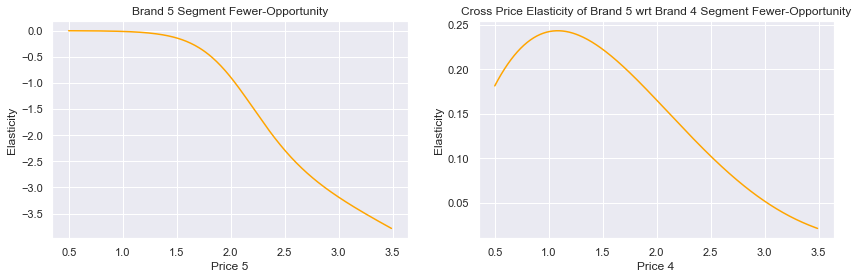

In [76]:
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_c0, color = 'orange')
axs[0].set_title('Brand 5 Segment Fewer-Opportunity')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_c0, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Fewer-Opportunity')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

### Standard

In [77]:
brand_choice_c2 = df_pa[df_pa['Incidence'] == 1]
brand_choice_c2 = brand_choice_c2[brand_choice_c2['Cluster'] == 2]

pd.options.display.max_rows = 100
brand_choice_c2

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster,Cluster_0,Cluster_1,Cluster_2,Cluster_3
2398,200000024,44,1,2,2,0,0,1.35,1.58,1.97,2.09,2.67,1,1,1,0,0,1,1,32,1,88428,0,0,2,0,0,1,0
2403,200000024,98,1,2,2,0,0,1.47,1.90,1.95,2.12,2.67,0,0,0,0,0,1,1,32,1,88428,0,0,2,0,0,1,0
2408,200000024,143,1,2,3,0,0,1.21,1.35,1.99,2.16,2.67,1,1,0,0,0,1,1,32,1,88428,0,0,2,0,0,1,0
2410,200000024,162,1,2,5,0,0,1.39,1.90,1.94,2.16,2.49,1,0,0,0,0,1,1,32,1,88428,0,0,2,0,0,1,0
2417,200000024,217,1,5,1,0,0,1.34,1.89,1.99,2.13,2.67,0,0,0,0,0,1,1,32,1,88428,0,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58436,200000498,579,1,3,5,3,1,1.22,1.89,2.01,2.14,2.73,0,1,0,0,0,1,1,29,1,114784,1,0,2,0,0,1,0
58444,200000498,626,1,3,3,0,0,1.48,1.57,2.06,2.24,2.79,0,0,1,0,0,1,1,29,1,114784,1,0,2,0,0,1,0
58450,200000498,657,1,2,5,0,0,1.26,1.88,2.06,2.24,2.79,0,0,0,0,0,1,1,29,1,114784,1,0,2,0,0,1,0
58453,200000498,675,1,2,5,0,0,1.42,1.85,2.06,2.24,2.77,0,1,0,0,0,1,1,29,1,114784,1,0,2,0,0,1,0


In [78]:
# model estimation
Y = brand_choice_c2['Brand']
brand_choice_c2 = pd.get_dummies(brand_choice_c2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_choice_c2
X = brand_choice_c2[features]
model_brand_choice_c2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_c2.fit(X, Y)

#coefficients table for cluster 2
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_c2.coef_))
bc_coef.columns = ['Brand_1','Brand_2','Brand_3','Brand_4','Brand_5']
bc_coef.index = ['Price_1','Price_2','Price_3','Price_4','Price_5']
bc_coef = bc_coef.round(2)
bc_coef

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Price_1,-3.01,1.09,1.19,0.27,0.47
Price_2,0.75,-2.06,0.46,0.37,0.48
Price_3,1.20,-0.50,0.36,-0.06,-1.00
Price_4,0.44,-0.28,0.99,-1.25,0.11
Price_5,-0.07,1.40,0.68,-0.86,-1.15


#### Own-brand price elasticity

In [79]:
df_own_brand_5_c2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_c2['Price_1'] = brand_choice_c2['Price_1'].mean()
df_own_brand_5_c2['Price_2'] = brand_choice_c2['Price_2'].mean()
df_own_brand_5_c2['Price_3'] = brand_choice_c2['Price_3'].mean()
df_own_brand_5_c2['Price_4'] = brand_choice_c2['Price_4'].mean()
df_own_brand_5_c2['Price_5'] = price_range

predict_own_brand_5_c2 = model_brand_choice_c2.predict_proba(df_own_brand_5_c2)
pr_own_brand_5_c2 = predict_own_brand_5_c2[: ][: , 4]

own_price_elasticity_brand_5_c2 =  beta5 * price_range * (1 - pr_own_brand_5_c2)
df_price_elasticity['Brand 5 C2'] = own_price_elasticity_brand_5_c2

#### Cross-brand price elasticity

In [80]:
df_brand5_cross_brand4_c2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_c2['Price_1'] = brand_choice_c2['Price_1'].mean()
df_brand5_cross_brand4_c2['Price_2'] = brand_choice_c2['Price_2'].mean()
df_brand5_cross_brand4_c2['Price_3'] = brand_choice_c2['Price_3'].mean()
df_brand5_cross_brand4_c2['Price_4'] = price_range
df_brand5_cross_brand4_c2['Price_5'] = brand_choice_c2['Price_5'].mean()

predict_brand5_cross_brand4_c2 = model_brand_choice_c2.predict_proba(df_brand5_cross_brand4_c2)
pr_cross_brand_5_c2 = predict_brand5_cross_brand4_c2[: ][: , 3]

brand5_cross_brand4_price_elasticity_c2 = -beta5 * price_range * pr_cross_brand_5_c2
df_price_elasticity['Brand_5_Cross_Brand_4_c2'] = brand5_cross_brand4_price_elasticity_c2
pd.options.display.max_rows = None
df_price_elasticity

,Price,Mean_price_elast,PE_Cluster_0,PE_Cluster_1,PE_Cluster_2,PE_Cluster_3,Elasticity_Promo_1,Elasticity_Promo_0,Brand 5,Brand_5_Cross_Brand_4,Brand 5 C1,Brand_5_Cross_Brand_4_C1,Brand 5 C0,Brand_5_Cross_Brand_4_c0,Brand 5 C2,Brand_5_Cross_Brand_4_c2
0,0.50,-0.096340,-0.030899,-0.167996,-0.211188,-0.119115,-0.125734,-0.195654,-0.048960,0.331371,-0.296739,0.481490,-0.001034,0.181244,-0.115616,0.173788
1,0.51,-0.100405,-0.032665,-0.172919,-0.217754,-0.123300,-0.129851,-0.201776,-0.050518,0.336637,-0.302774,0.490777,-0.001096,0.183537,-0.118649,0.175840
2,0.52,-0.104597,-0.034517,-0.177913,-0.224428,-0.127578,-0.134046,-0.208000,-0.052106,0.341846,-0.308818,0.500049,-0.001161,0.185780,-0.121717,0.177841
3,0.53,-0.108919,-0.036461,-0.182978,-0.231210,-0.131952,-0.138321,-0.214328,-0.053723,0.346998,-0.314874,0.509305,-0.001229,0.187975,-0.124820,0.179791
4,0.54,-0.113374,-0.038499,-0.188114,-0.238101,-0.136422,-0.142677,-0.220760,-0.055370,0.352093,-0.320940,0.518545,-0.001300,0.190122,-0.127959,0.181690
5,0.55,-0.117966,-0.040636,-0.193323,-0.245102,-0.140989,-0.147116,-0.227297,-0.057048,0.357130,-0.327018,0.527770,-0.001376,0.192221,-0.131134,0.183540
6,0.56,-0.122697,-0.042877,-0.198603,-0.252214,-0.145656,-0.151637,-0.233939,-0.058757,0.362109,-0.333107,0.536978,-0.001455,0.194272,-0.134345,0.185340
7,0.57,-0.127572,-0.045225,-0.203956,-0.259436,-0.150424,-0.156242,-0.240688,-0.060497,0.367031,-0.339209,0.546171,-0.001539,0.196275,-0.137593,0.187091
8,0.58,-0.132593,-0.047686,-0.209382,-0.266771,-0.155294,-0.160931,-0.247544,-0.062270,0.371895,-0.345324,0.555347,-0.001626,0.198231,-0.140879,0.188794
9,0.59,-0.137764,-0.050264,-0.214882,-0.274218,-0.160268,-0.165707,-0.254508,-0.064075,0.376702,-0.351451,0.564506,-0.001719,0.200140,-0.144202,0.190447


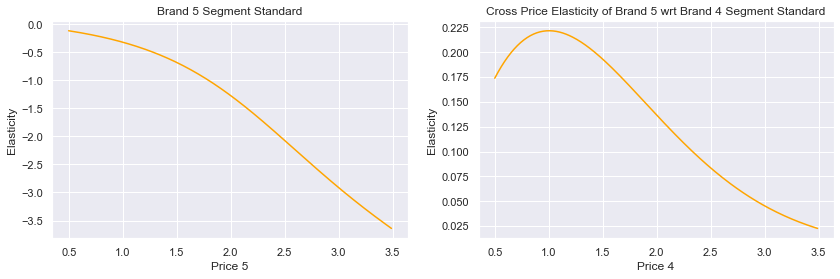

In [81]:
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_c2, color = 'orange')
axs[0].set_title('Brand 5 Segment Standard')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_c2, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Standard')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

### Career-focused

In [82]:
brand_choice_c3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_c3 = brand_choice_c3[brand_choice_c3['Cluster'] == 3]

pd.options.display.max_rows = 100
brand_choice_c3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster,Cluster_0,Cluster_1,Cluster_2,Cluster_3
376,200000005,51,1,5,1,0,0,1.35,1.87,1.93,2.09,2.59,1,1,1,0,0,0,0,49,1,121466,1,2,3,0,0,0,1
377,200000005,57,1,5,1,5,1,1.39,1.90,1.91,2.12,2.62,1,0,0,0,0,0,0,49,1,121466,1,2,3,0,0,0,1
394,200000005,159,1,5,2,0,0,1.39,1.90,1.94,2.16,2.62,1,0,0,0,0,0,0,49,1,121466,1,2,3,0,0,0,1
396,200000005,178,1,5,3,0,0,1.48,1.50,1.99,2.16,2.49,0,0,0,1,1,0,0,49,1,121466,1,2,3,0,0,0,1
410,200000005,249,1,5,1,0,0,1.46,1.89,1.99,2.15,2.65,0,0,0,0,0,0,0,49,1,121466,1,2,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57586,200000491,690,1,5,2,5,1,1.50,1.87,2.06,2.24,2.78,0,1,0,0,0,0,0,35,1,150237,2,2,3,0,0,0,1
57587,200000491,697,1,5,5,5,1,1.42,1.51,1.97,2.24,2.78,0,0,0,0,0,0,0,35,1,150237,2,2,3,0,0,0,1
57588,200000491,704,1,5,5,5,1,1.41,1.85,2.01,2.24,2.79,0,0,0,0,0,0,0,35,1,150237,2,2,3,0,0,0,1
57589,200000491,714,1,5,1,5,1,1.50,1.80,2.09,2.24,2.79,0,0,0,0,0,0,0,35,1,150237,2,2,3,0,0,0,1


In [83]:
# model estimation
Y = brand_choice_c3['Brand']
brand_choice_c3 = pd.get_dummies(brand_choice_c3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_choice_c3
X = brand_choice_c3[features]
model_brand_choice_c3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_c3.fit(X, Y)

#coefficients table for cluster 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_c3.coef_))
bc_coef.columns = ['Brand_1','Brand_2','Brand_3','Brand_4','Brand_5']
bc_coef.index = ['Price_1','Price_2','Price_3','Price_4','Price_5']
bc_coef = bc_coef.round(2)
bc_coef

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Price_1,-2.38,1.13,1.39,-0.02,-0.11
Price_2,0.73,-1.65,0.05,0.40,0.47
Price_3,1.17,0.21,0.46,-1.71,-0.13
Price_4,0.03,0.65,0.41,-1.08,-0.01
Price_5,-0.00,-0.20,0.34,0.42,-0.55


#### Own-brand price elasticity

In [84]:
df_own_brand_5_c3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_c3['Price_1'] = brand_choice_c3['Price_1'].mean()
df_own_brand_5_c3['Price_2'] = brand_choice_c3['Price_2'].mean()
df_own_brand_5_c3['Price_3'] = brand_choice_c3['Price_3'].mean()
df_own_brand_5_c3['Price_4'] = brand_choice_c3['Price_4'].mean()
df_own_brand_5_c3['Price_5'] = price_range

predict_own_brand_5_c3 = model_brand_choice_c3.predict_proba(df_own_brand_5_c3)
pr_own_brand_5_c3 = predict_own_brand_5_c3[: ][: , 4]

own_price_elasticity_brand_5_c3 =  beta5 * price_range * (1 - pr_own_brand_5_c3)
df_price_elasticity['Brand 5 C3'] = own_price_elasticity_brand_5_c3

#### Cross-brand price elasticity

In [85]:
df_brand5_cross_brand4_c3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_c3['Price_1'] = brand_choice_c3['Price_1'].mean()
df_brand5_cross_brand4_c3['Price_2'] = brand_choice_c3['Price_2'].mean()
df_brand5_cross_brand4_c3['Price_3'] = brand_choice_c3['Price_3'].mean()
df_brand5_cross_brand4_c3['Price_4'] = price_range
df_brand5_cross_brand4_c3['Price_5'] = brand_choice_c3['Price_5'].mean()

predict_brand5_cross_brand4_c3 = model_brand_choice_c3.predict_proba(df_brand5_cross_brand4_c3)
pr_cross_brand_5_c3 = predict_brand5_cross_brand4_c3[: ][: , 3]

brand5_cross_brand4_price_elasticity_c3 = -beta5 * price_range * pr_cross_brand_5_c3
df_price_elasticity['Brand_5_Cross_Brand_4_c3'] = brand5_cross_brand4_price_elasticity_c3
pd.options.display.max_rows = None
df_price_elasticity

,Price,Mean_price_elast,PE_Cluster_0,PE_Cluster_1,PE_Cluster_2,PE_Cluster_3,Elasticity_Promo_1,Elasticity_Promo_0,Brand 5,Brand_5_Cross_Brand_4,Brand 5 C1,Brand_5_Cross_Brand_4_C1,Brand 5 C0,Brand_5_Cross_Brand_4_c0,Brand 5 C2,Brand_5_Cross_Brand_4_c2,Brand 5 C3,Brand_5_Cross_Brand_4_c3
0,0.50,-0.096340,-0.030899,-0.167996,-0.211188,-0.119115,-0.125734,-0.195654,-0.048960,0.331371,-0.296739,0.481490,-0.001034,0.181244,-0.115616,0.173788,-0.043855,0.194391
1,0.51,-0.100405,-0.032665,-0.172919,-0.217754,-0.123300,-0.129851,-0.201776,-0.050518,0.336637,-0.302774,0.490777,-0.001096,0.183537,-0.118649,0.175840,-0.044940,0.196870
2,0.52,-0.104597,-0.034517,-0.177913,-0.224428,-0.127578,-0.134046,-0.208000,-0.052106,0.341846,-0.308818,0.500049,-0.001161,0.185780,-0.121717,0.177841,-0.046034,0.199299
3,0.53,-0.108919,-0.036461,-0.182978,-0.231210,-0.131952,-0.138321,-0.214328,-0.053723,0.346998,-0.314874,0.509305,-0.001229,0.187975,-0.124820,0.179791,-0.047137,0.201676
4,0.54,-0.113374,-0.038499,-0.188114,-0.238101,-0.136422,-0.142677,-0.220760,-0.055370,0.352093,-0.320940,0.518545,-0.001300,0.190122,-0.127959,0.181690,-0.048250,0.204004
5,0.55,-0.117966,-0.040636,-0.193323,-0.245102,-0.140989,-0.147116,-0.227297,-0.057048,0.357130,-0.327018,0.527770,-0.001376,0.192221,-0.131134,0.183540,-0.049372,0.206282
6,0.56,-0.122697,-0.042877,-0.198603,-0.252214,-0.145656,-0.151637,-0.233939,-0.058757,0.362109,-0.333107,0.536978,-0.001455,0.194272,-0.134345,0.185340,-0.050504,0.208510
7,0.57,-0.127572,-0.045225,-0.203956,-0.259436,-0.150424,-0.156242,-0.240688,-0.060497,0.367031,-0.339209,0.546171,-0.001539,0.196275,-0.137593,0.187091,-0.051645,0.210689
8,0.58,-0.132593,-0.047686,-0.209382,-0.266771,-0.155294,-0.160931,-0.247544,-0.062270,0.371895,-0.345324,0.555347,-0.001626,0.198231,-0.140879,0.188794,-0.052797,0.212819
9,0.59,-0.137764,-0.050264,-0.214882,-0.274218,-0.160268,-0.165707,-0.254508,-0.064075,0.376702,-0.351451,0.564506,-0.001719,0.200140,-0.144202,0.190447,-0.053957,0.214900


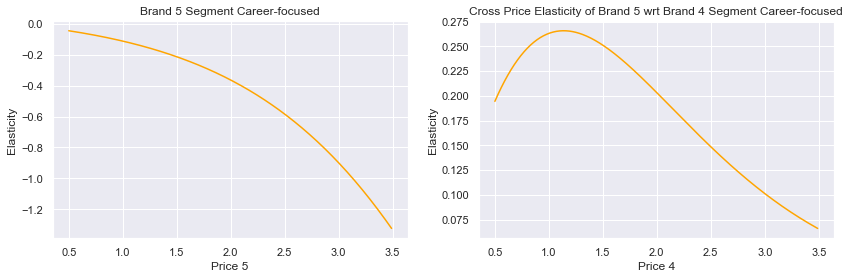

In [86]:
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_c3, color = 'orange')
axs[0].set_title('Brand 5 Segment Career-focused')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_c3, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Career-focused')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

Text(0.5, 0, 'Price 4')

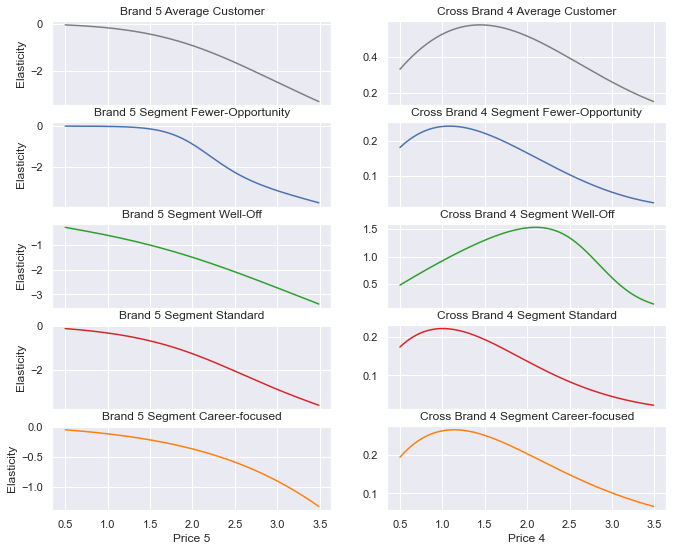

In [87]:
# Summarize all
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elast_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_c0)
ax2[0].set_title('Brand 5 Segment Fewer-Opportunity')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_c0)
ax2[1].set_title('Cross Brand 4 Segment Fewer-Opportunity')

ax3[0].plot(price_range, own_price_elasticity_brand_5_c1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Well-Off')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_c1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Well-Off')

ax4[0].plot(price_range, own_price_elasticity_brand_5_c2, 'tab:red')
ax4[0].set_title('Brand 5 Segment Standard')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_c2, 'tab:red')
ax4[1].set_title('Cross Brand 4 Segment Standard')

ax5[0].plot(price_range, own_price_elasticity_brand_5_c3, 'tab:orange')
ax5[0].set_title('Brand 5 Segment Career-focused')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_c3, 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Career-focused')
ax5[1].set_xlabel('Price 4')

## Interpretation
We will look at price range from 1.1 to 2.8 only (that's where our min and max prices are)  
- For Career-focused cluster, we clearly see they are inelastic at any price. For marketing startgy, we can say that we can increase the price for this cluster while we won't take high risk to loose customers.
- For Fewer-opportunity, their elasticity go deepest dramatically when the price is increase, this shows that they are very price sensitive to luxury candy bar. However the cross brand graph is the same as Career-focused and Well-Off. Why? For a reminder, fewer-opportunity rarely buy both brand 4 and brand 5 (less than 1 percent), so this graph tell nothing. Not enough data.
- For Well-Off, we can see they are more inelastic compared to career-focused. However, if we look at the cross brand we can see the graph can go up for very long price range. For marketing startegy, we can say that we can decrease price of brand 4 to increase sales of brand 5 for this well-off cluster, and it won't affect Career-Focused either! (Remember these 2 clusters are the biggest buyers for brand 4 and 5)

## Purchase Quantity

### Prepare data and model

In [88]:
df_purchase_quantity = df_pa[df_pa['Incidence'] == 1]

In [89]:
df_purchase_quantity = pd.get_dummies(df_purchase_quantity, columns = ['Brand'], prefix = 'Brand')

In [90]:
df_purchase_quantity.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,2.654296,0.372455,0.349638,0.043858,0.128091,0.045430,0.357289,0.385162,40.346905,1.151045,126706.452043,0.845471,0.797513,1.479984,0.293824,0.231657,0.175229,0.299290,0.092226,0.310288,0.057453,0.199959,0.340074
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,0.097724,0.483475,0.476872,0.204787,0.334203,0.208252,0.479217,0.486650,12.346284,0.634625,39935.109358,0.633840,0.810358,1.198301,0.455528,0.421906,0.380176,0.457962,0.289354,0.462627,0.232714,0.399983,0.473750
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,2.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,2.630000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,1.000000,102723.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,2.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,1.000000,122895.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,2.700000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,49.000000,2.000000,147967.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,2.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
df_purchase_quantity.columns.values

array(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Cluster',
       'Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3', 'Brand_1',
       'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5'], dtype=object)

In [92]:
df_purchase_quantity['Price_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1'] +
                                           df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2'] +
                                           df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3'] +
                                           df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4'] +
                                           df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'] )

In [93]:
df_purchase_quantity['Promotion_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1'] +
                                               df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2'] +
                                               df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3'] +
                                               df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4'] +
                                               df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'] )

### Model estimation Linear Regression

In [94]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]
pd.options.display.max_rows = 100
X

,Price_Incidence,Promotion_Incidence
6,1.90,0
11,2.62,1
19,1.47,0
24,2.16,0
29,1.88,0
...,...,...
58621,1.89,0
58648,1.35,1
58674,1.85,1
58687,1.51,0


In [96]:
Y = df_purchase_quantity['Quantity']
Y.head()

6     2
11    1
19    2
24    1
29    3
Name: Quantity, dtype: int64

In [97]:
model_quantity = LinearRegression()
model_quantity.fit(X, Y)

LinearRegression()

In [98]:
model_quantity.coef_

array([-0.8173651 , -0.10504673])

#### Interpretation
The first coefficient is the price, this makes sense cuz if the price go up 1 unit, the customer will buy less.  
But for the second coefficient is the promotion, this doesn't seem right. If the promotino go up, quantity should go up too. This might indicated that we are missing some significant predictors or the average across all cluster doesn't show any meaningful result

### Price Elasticity in quantity with Promotion

In [99]:
df_price_elasticity_quantity = pd.DataFrame()
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1

In [100]:
df_price_elasticity_quantity

,Price_Incidence,Promotion_Incidence
0,0.50,1
1,0.51,1
2,0.52,1
3,0.53,1
4,0.54,1
...,...,...
295,3.45,1
296,3.46,1
297,3.47,1
298,3.48,1


In [101]:
beta_quantity = model_quantity.coef_[0]
beta_quantity

-0.8173651016685002

In [103]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

In [104]:
price_elasticity_quantity_promotion_yes = beta_quantity * price_range / predict_quantity

In [105]:
df_price_elasticity['PE_Quantity_Promotion_1'] = price_elasticity_quantity_promotion_yes
df_price_elasticity

,Price,Mean_price_elast,PE_Cluster_0,PE_Cluster_1,PE_Cluster_2,PE_Cluster_3,Elasticity_Promo_1,Elasticity_Promo_0,Brand 5,Brand_5_Cross_Brand_4,Brand 5 C1,Brand_5_Cross_Brand_4_C1,Brand 5 C0,Brand_5_Cross_Brand_4_c0,Brand 5 C2,Brand_5_Cross_Brand_4_c2,Brand 5 C3,Brand_5_Cross_Brand_4_c3,PE_Quantity_Promotion_1
0,0.50,-0.096340,-0.030899,-0.167996,-0.211188,-0.119115,-0.125734,-0.195654,-0.048960,0.331371,-0.296739,0.481490,-0.001034,0.181244,-0.115616,0.173788,-0.043855,0.194391,-0.102157
1,0.51,-0.100405,-0.032665,-0.172919,-0.217754,-0.123300,-0.129851,-0.201776,-0.050518,0.336637,-0.302774,0.490777,-0.001096,0.183537,-0.118649,0.175840,-0.044940,0.196870,-0.104413
2,0.52,-0.104597,-0.034517,-0.177913,-0.224428,-0.127578,-0.134046,-0.208000,-0.052106,0.341846,-0.308818,0.500049,-0.001161,0.185780,-0.121717,0.177841,-0.046034,0.199299,-0.106679
3,0.53,-0.108919,-0.036461,-0.182978,-0.231210,-0.131952,-0.138321,-0.214328,-0.053723,0.346998,-0.314874,0.509305,-0.001229,0.187975,-0.124820,0.179791,-0.047137,0.201676,-0.108954
4,0.54,-0.113374,-0.038499,-0.188114,-0.238101,-0.136422,-0.142677,-0.220760,-0.055370,0.352093,-0.320940,0.518545,-0.001300,0.190122,-0.127959,0.181690,-0.048250,0.204004,-0.111238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.010884,-12.542811,-4.022400,-5.044393,-5.684732,-4.862027,-4.983629,-3.225338,0.161922,-3.330875,0.157168,-3.738854,0.023363,-3.585523,0.024005,-1.284937,0.068463,-1.774292
296,3.46,-8.036131,-12.579731,-4.037270,-5.061230,-5.704896,-4.880230,-5.000536,-3.241500,0.160025,-3.344180,0.151757,-3.750274,0.022904,-3.599401,0.023650,-1.294727,0.067841,-1.788634
297,3.47,-8.061344,-12.616634,-4.052122,-5.078048,-5.725023,-4.898402,-5.017423,-3.257631,0.158143,-3.357481,0.146511,-3.761674,0.022452,-3.613234,0.023299,-1.304572,0.067224,-1.803124
298,3.48,-8.086522,-12.653521,-4.066959,-5.094849,-5.745114,-4.916544,-5.034290,-3.273729,0.156275,-3.370779,0.141426,-3.773054,0.022007,-3.627024,0.022952,-1.314472,0.066611,-1.817766


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

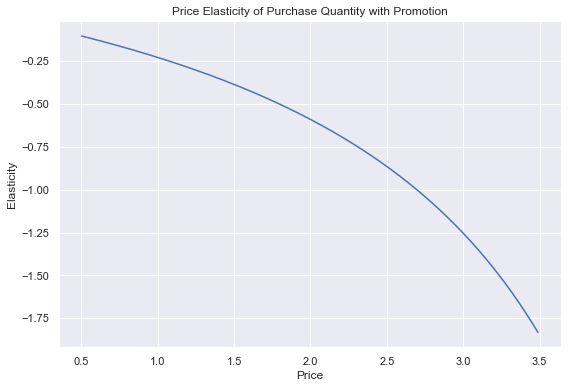

In [106]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

### Price Elasticity without Promotion

In [109]:
df_price_elasticity_quantity['Promotion_Incidence'] = 0

predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

price_elasticity_quantity_promotion_no = beta_quantity * price_range / predict_quantity

df_price_elasticity['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promotion_no
df_price_elasticity

,Price,Mean_price_elast,PE_Cluster_0,PE_Cluster_1,PE_Cluster_2,PE_Cluster_3,Elasticity_Promo_1,Elasticity_Promo_0,Brand 5,Brand_5_Cross_Brand_4,Brand 5 C1,Brand_5_Cross_Brand_4_C1,Brand 5 C0,Brand_5_Cross_Brand_4_c0,Brand 5 C2,Brand_5_Cross_Brand_4_c2,Brand 5 C3,Brand_5_Cross_Brand_4_c3,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096340,-0.030899,-0.167996,-0.211188,-0.119115,-0.125734,-0.195654,-0.048960,0.331371,-0.296739,0.481490,-0.001034,0.181244,-0.115616,0.173788,-0.043855,0.194391,-0.102157,-0.099543
1,0.51,-0.100405,-0.032665,-0.172919,-0.217754,-0.123300,-0.129851,-0.201776,-0.050518,0.336637,-0.302774,0.490777,-0.001096,0.183537,-0.118649,0.175840,-0.044940,0.196870,-0.104413,-0.101736
2,0.52,-0.104597,-0.034517,-0.177913,-0.224428,-0.127578,-0.134046,-0.208000,-0.052106,0.341846,-0.308818,0.500049,-0.001161,0.185780,-0.121717,0.177841,-0.046034,0.199299,-0.106679,-0.103939
3,0.53,-0.108919,-0.036461,-0.182978,-0.231210,-0.131952,-0.138321,-0.214328,-0.053723,0.346998,-0.314874,0.509305,-0.001229,0.187975,-0.124820,0.179791,-0.047137,0.201676,-0.108954,-0.106150
4,0.54,-0.113374,-0.038499,-0.188114,-0.238101,-0.136422,-0.142677,-0.220760,-0.055370,0.352093,-0.320940,0.518545,-0.001300,0.190122,-0.127959,0.181690,-0.048250,0.204004,-0.111238,-0.108369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.010884,-12.542811,-4.022400,-5.044393,-5.684732,-4.862027,-4.983629,-3.225338,0.161922,-3.330875,0.157168,-3.738854,0.023363,-3.585523,0.024005,-1.284937,0.068463,-1.774292,-1.664290
296,3.46,-8.036131,-12.579731,-4.037270,-5.061230,-5.704896,-4.880230,-5.000536,-3.241500,0.160025,-3.344180,0.151757,-3.750274,0.022904,-3.599401,0.023650,-1.294727,0.067841,-1.788634,-1.677205
297,3.47,-8.061344,-12.616634,-4.052122,-5.078048,-5.725023,-4.898402,-5.017423,-3.257631,0.158143,-3.357481,0.146511,-3.761674,0.022452,-3.613234,0.023299,-1.304572,0.067224,-1.803124,-1.690246
298,3.48,-8.086522,-12.653521,-4.066959,-5.094849,-5.745114,-4.916544,-5.034290,-3.273729,0.156275,-3.370779,0.141426,-3.773054,0.022007,-3.627024,0.022952,-1.314472,0.066611,-1.817766,-1.703414


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

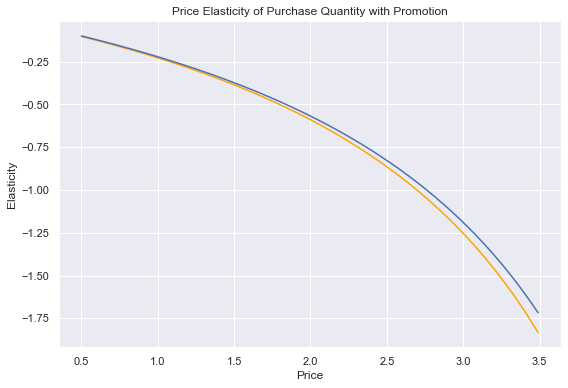

In [110]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color = 'orange')
plt.plot(price_range, price_elasticity_quantity_promotion_no)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')